# DFT Helio

In [8]:
import numpy as np
import scipy as sp
#import sympy as sym
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#init_printing()

## Solucion de la ecuacion de Schrodinger

In [126]:
def schr(x,V):
    
    print('Resolviendo Schrodinger')

    h = x[1]-x[0] # Delta x

    E = -0.5
    deltaE = 0.02

    #m = 1
    count = 0
    while (x[N-1]>0.2):

        if (m<0):
            E = E - deltaE
        else:
            E = E + deltaE

        y = np.zeros_like(x) # y va de 0 a N-1

        #Condiciones iniciales
        y[0] = 0.0
        y[1] = h

        for i in range(1,N-1):
            y[i+1] = -2*(h**2) *(E-V[i])*y[i] + 2*y[i] - y[i-1]

        # Calculo la derivada en x = 10
        #m = (y[int(N)-1]-y[int(N)-2])/h

        count = count + 1

    #print('E=',E)
    return E,y

In [114]:
# Definición del Potencial

def Vpot(x):
    #return ( (x-5)**2 )/ 2.0
    return -1/x

In [3]:
def g(y, x, E):
    return [y[1],2*(Vpot(x)-E)*y[0]]

## Hago un grid logaritmico 

$ r_j = r_p[exp(j\delta) - 1] \qquad , \qquad j = 0,1,\cdots,j_{max} $

$ r_p = r_{max}/[exp(j_{max}\delta) - 1] $

<function matplotlib.pyplot.show>

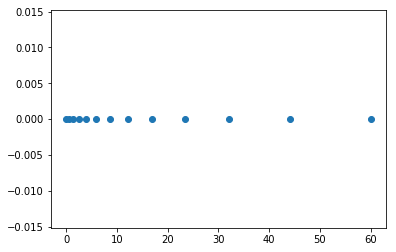

In [127]:
# Hago un grid logaritmico 

r_min = 0.01
r_max = 60
j_max = 12 #Cantidad de puntos totales
delta = 0.3 # Controla el espaciamiento relativo

r_p = r_max/(np.exp(j_max*delta)-1)

#x = np.linspace(r_min,r_max,j_max)
j = np.linspace(0,j_max,j_max+1) # j va de 0 a j_max

plt.scatter( r_p*(np.exp(j*delta)-1),0*j )
plt.show

In [30]:
# Valores iniciales de phi(x) y phi'(x)

r_max = 10.0
initialY = r_max*np.exp(-r_max),(1.0-r_max)*np.exp(-r_max)

# Valor tentativo de E (para el atomo de Hidrogeno)
E = -0.5

x = np.linspace(r_max,0.01,1000) # Integro de derecha a izquierda

# Solucion ecuación diferencial
sol = odeint(g,initialY,x,(E,))
print('phi(r=0)=',sol[999,0])

norm = sp.integrate.simps(sol[:,0]**2,x)
print('norm=',-norm)

# Ploteo la solución (la densidad, phi cuadrado, normalizada)
plt.plot(x, (sol[:,0]**2)/-norm, color='b')
plt.axis([0, 4, 0,0.7])
#plt.plot(x,Vpot(x),color='k') # Plotea el potencial

plt.title('u(r)=phi(r)**2',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('u(r)',fontsize=20)
plt.show()


ValueError: setting an array element with a sequence.

## Incluyo el potencial de Hartree

### Tengo que resolver la ecuacion

$ U''(r) = -\cfrac{u^2(r)}{r} $

$ U(0) = 0 $

$ U(r_{max}) = q_{max} $

$ U(r) = r V_H(r) $

$ n(r) = \sum_k \vert \psi_k(r)\vert^2 $ 

In [10]:
# Definición de la funcion densidad u(x)
# Uso de base las funciones hidrogenicas

def u(x):
    #return ( (x-5)**2 )/ 2.0
    return 2*x*np.exp(-x)

In [11]:
def h(y, x):
    return [y[1],-(u(x)**2/x)*y[0]]

## Chequeo para el Hidrogeno

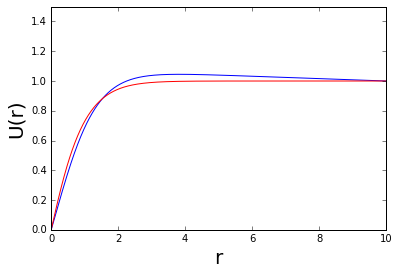

In [17]:
# Valores iniciales de U(x) y U'(x)

r_max = 10.0
q_max = 1.0 # Carga total para el Hidrogeno
initialY = 0.0001,1.0

# Valor tentativo de E (para el atomo de Hidrogeno)
#E = -0.5

x = np.linspace(0.0001,r_max,1000) # Integro de izquierda a derecha

# Solucion ecuación diferencial
sol = odeint(h,initialY,x)

alpha = (q_max-sol[1000-1,0])/r_max

# Ploteo la solución (la densidad, phi cuadrado, normalizada)
plt.plot(x, sol[:,0]+alpha*x, color='b') # Numerica
#plt.plot(x, (sol[:,0]+alpha*x)/x, color='r')
plt.plot(x,1-(x+1)*np.exp(-2*x),color='r') # Teorica
plt.axis([0, 10, 0,1.5])
#plt.plot(x,Vpot(x),color='k') # Plotea el potencial

#plt.title('U(r)=phi(r)**2',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('U(r)',fontsize=20)

plt.show()

## Lo hago para el Helio

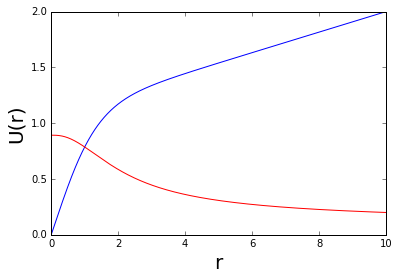

In [50]:
# Valores iniciales de U(x) y U'(x)

r_max = 10.0
q_max = 2.0 # Carga total para el Helio
initialY = 0.0001,1.0

# Valor tentativo de E (para el atomo de Hidrogeno)
#E = -0.5

x = np.linspace(0.0001,r_max,1000) # Integro de izquierda a derecha

# Solucion ecuación diferencial
sol = odeint(h,initialY,x)

alpha = (q_max-sol[1000-1,0])/r_max

# Ploteo la solución (la densidad, phi cuadrado, normalizada)
plt.plot(x, sol[:,0]+alpha*x, color='b') # Numerica
V_H = (sol[:,0]+alpha*x)/x
plt.plot(x, V_H, color='r') # Este es el V_H
plt.axis([0, 10, 0, 2])
#plt.plot(x,Vpot(x),color='k') # Plotea el potencial

#plt.title('U(r)=phi(r)**2',fontsize=20)
plt.xlabel('r',fontsize=20)
plt.ylabel('U(r)',fontsize=20)

plt.show()

In [76]:
# La solucion de el problema en cada paso
def u(w):
    for i in range(1,N):
        if (w <= x[i] and w > x[i-1]):
            break
    return sol[i,0]

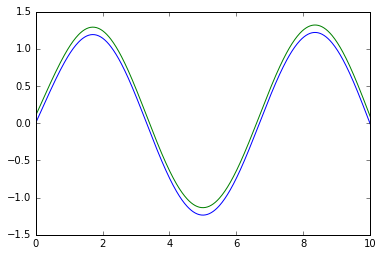

In [85]:
uu=np.zeros(N)

for i in range(N):
    uu[i]=u(x[i])
plt.plot(x,uu,x,sol[:,0]+0.1)

## Aca calculo la energia para el Helio iterando con DFT

In [127]:
N = 100
r_max = 10.0
q_max = 2.0 # Carga total para el Helio
initialY = 0.001,1.0

x = np.linspace(0.001,r_max,N) # Integro de izquierda a derecha

# Definición de la funcion densidad u(x)
# Uso de base las funciones hidrogenicas

def u(x):
    return 2*x*np.exp(-x)

# Defino la funcion a integrar, para calcular la U
def h(y, x):
    return [y[1],-(u(x)**2/x)*y[0]]

sol = odeint(h,initialY,x)

#######################################
### ACA EMPIEZO LA ITERACION DE DFT ###
#######################################
for j in range(4):
    
    print('iteracion ',j)
    alpha = (q_max-sol[N-1,0])/r_max
    V_H = (sol[:,0]+alpha*x)/x
    V_tot = np.zeros(N)

    for i in range(N):
        V_tot[i] = V_H[i] + Vpot(x[i])

    # Solucion ecuación diferencial
    print('caca')
    E = schr(x,V_tot)[0]


    #Calculo la energia. Ecuacion (5.36) Thijssen
    E =  2*E- sp.integrate.simps(V_H* sol[:,0]**2,x)
    print('E =',E)
    #norm = sp.integrate.simps(sol[:,0]**2,x)

    # Redefino el u

    def uu(w):
        for i in range(1,N):
            if (w <= x[i] and w > x[i-1]):
                break
        return sol[i,0]
    
    def h(y, x):
        return [y[1],-(uu(x)**2/x)*y[0]]
    
    sol = odeint(h,initialY,x)


('iteracion ', 0)
caca
Resolviendo Schrodinger


KeyboardInterrupt: 

In [97]:
for i in range(4):
    print(i)

0
1
2
3
